In [25]:
import pyfer
from importlib import reload

In [26]:
reload(pyfer)

<module 'pyfer' from '/home/son/mysrc/projects/fer-project/pyfer/__init__.py'>

In [23]:
pyfer.test()

'/home/son/mysrc/projects/fer-project'

In [24]:
pyfer.path()

'/home/son/mysrc/projects/fer-project/pyfer/__init__.py'

In [27]:
from pyfer import face_detector

In [30]:
import cv2
import matplotlib.pyplot as plt

In [31]:
image = cv2.imread("public/pewdiepie.jpg")
base_img = image.copy()
original_size = base_img.shape
target_size = (300, 300)
image = cv2.resize(image, target_size)
aspect_ratio_x = (original_size[1] / target_size[1])
aspect_ratio_y = (original_size[0] / target_size[0])

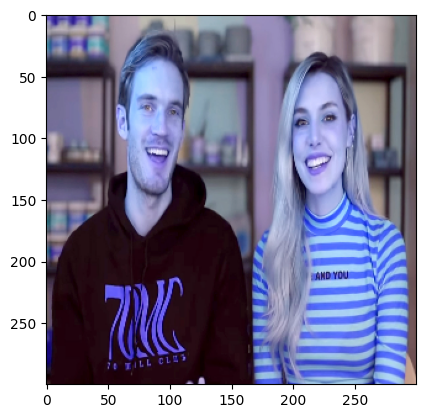

In [32]:
plt.imshow(image)

In [48]:
from pyfer import face_detector
reload(pyfer)
reload(face_detector)

<module 'pyfer.face_detector' from '/home/son/mysrc/projects/fer-project/pyfer/face_detector/__init__.py'>

In [49]:
imageBlob = cv2.dnn.blobFromImage(image = image)

In [50]:
detector = face_detector.get_detector()

In [51]:
detector.setInput(imageBlob)
detections = detector.forward()

In [55]:
import pandas as pd

In [56]:
column_labels = ["img_id", "is_face", "confidence", "left", "top", "right", "bottom"]
detections_df = pd.DataFrame(detections[0][0], columns = column_labels)

In [59]:
detections_df = pd.DataFrame(detections[0][0]
    , columns = ["img_id", "is_face", "confidence", "left", "top", "right", "bottom"])

In [60]:
detections_df = detections_df[detections_df['is_face'] == 1] #0: background, 1: face
detections_df = detections_df[detections_df['confidence'] >= 0.90]

In [61]:
detections_df.head()

,img_id,is_face,confidence,left,top,right,bottom
0,0.0,1.0,0.999935,0.226082,0.117060,0.375238,0.474718
1,0.0,1.0,0.998904,0.665231,0.157017,0.816201,0.480152


Id  0
Confidence:  99.99 %


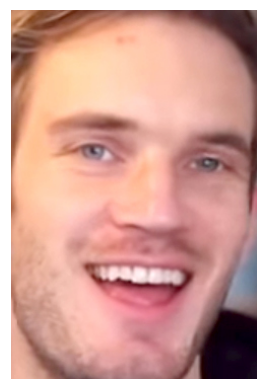

Id  1
Confidence:  99.89 %


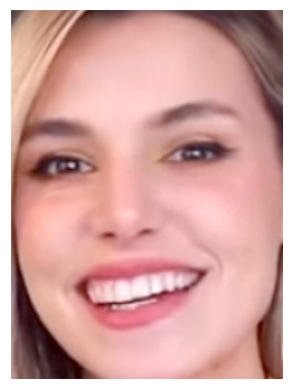

In [62]:
for i, instance in detections_df.iterrows():
    #print(instance)
    
    confidence_score = str(round(100*instance["confidence"], 2))+" %"
    
    left = int(instance["left"] * 300)
    bottom = int(instance["bottom"] * 300)
    right = int(instance["right"] * 300)
    top = int(instance["top"] * 300)
        
    #low resolution
    #detected_face = image[top:bottom, left:right]
    
    #high resolution
    detected_face = base_img[int(top*aspect_ratio_y):int(bottom*aspect_ratio_y), int(left*aspect_ratio_x):int(right*aspect_ratio_x)]
    
    if detected_face.shape[0] > 0 and detected_face.shape[1] > 0:
        
        #plt.figure(figsize = (3, 3))
        
        #low resolution
        #cv2.putText(image, confidence_score, (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
        #cv2.rectangle(image, (left, top), (right, bottom), (255, 255, 255), 1) #draw rectangle to main image
        
        #high resolution
        cv2.putText(base_img, confidence_score, (int(left*aspect_ratio_x), int(top*aspect_ratio_y-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
        cv2.rectangle(base_img, (int(left*aspect_ratio_x), int(top*aspect_ratio_y)), (int(right*aspect_ratio_x), int(bottom*aspect_ratio_y)), (255, 255, 255), 1) #draw rectangle to main image
        
        #-------------------
        
        print("Id ",i)
        print("Confidence: ", confidence_score)
        #detected_face = cv2.resize(detected_face, (224, 224))
        plt.imshow(detected_face[:,:,::-1])
        plt.axis('off')
        plt.show()


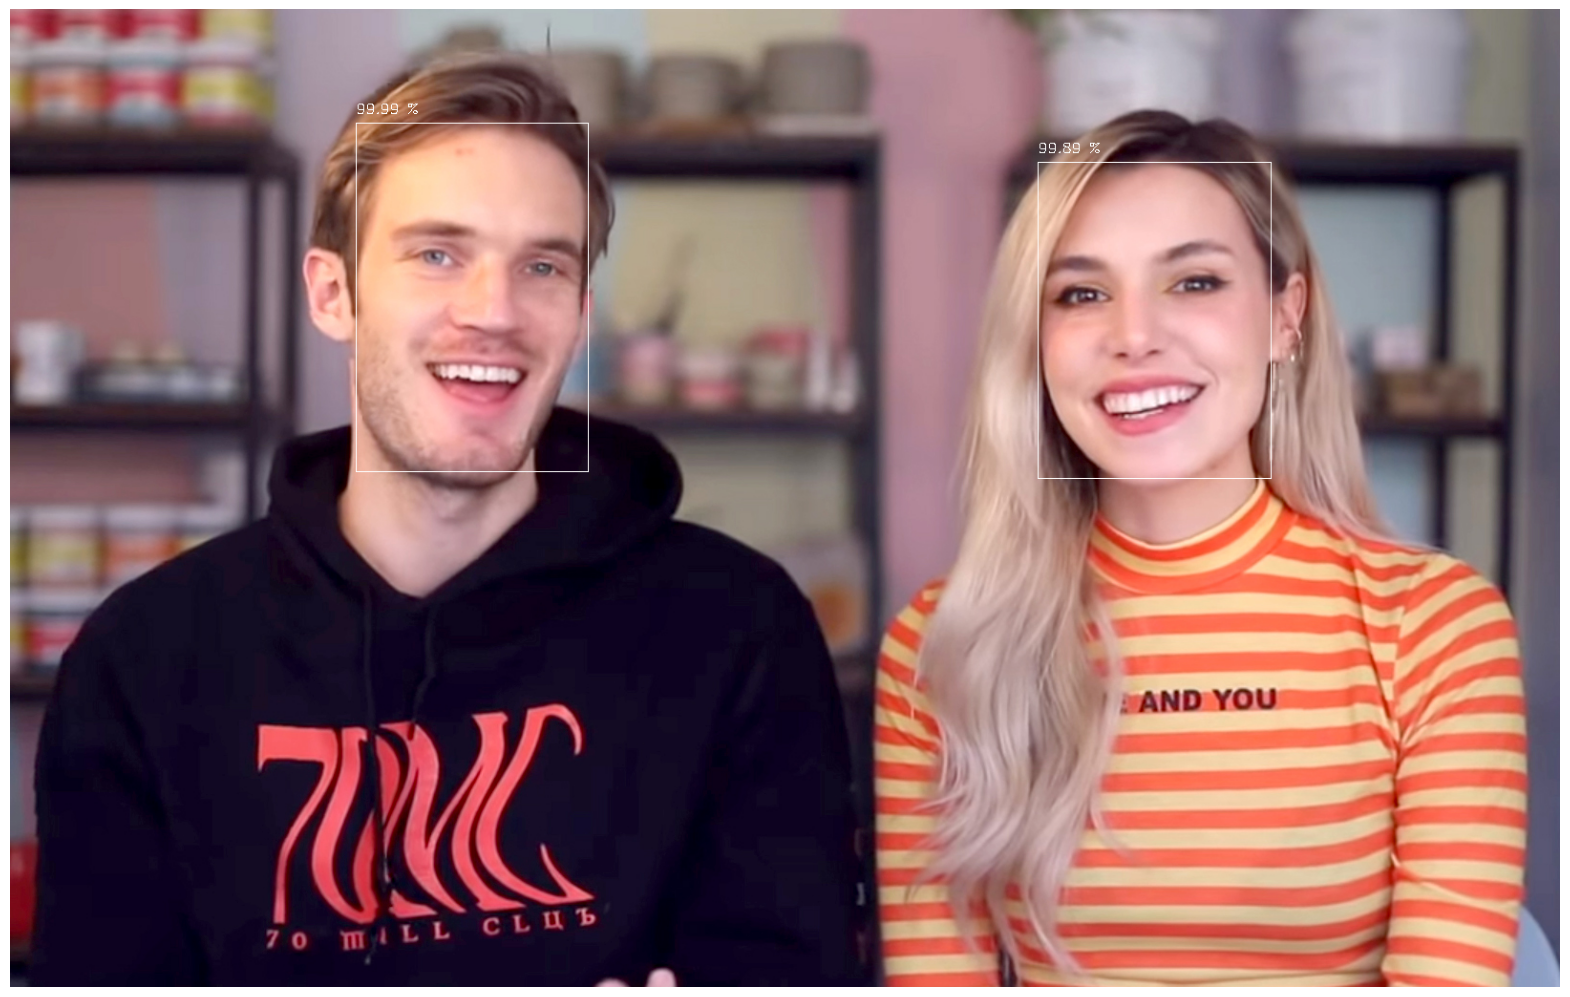

In [63]:
plt.figure(figsize = (20, 20))
#tmp_img = image.copy()
#tmp_img = cv2.resize(tmp_img, (600, 600))
plt.imshow(base_img[:,:,::-1])
plt.axis('off')
plt.show()

In [1]:
from deepface import DeepFace

23-12-10 16:39:48 - Directory /home/son/.deepface created
23-12-10 16:39:48 - Directory /home/son/.deepface/weights created
